# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [24]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [12]:
#1. How many rows and columns does the dataset contain?
data.shape
#2. Are there any NaN values present?
print(f'Any NaN values among the data? {data.isna().values.any()}')

#3. Are there any duplicate rows?
print(f'Any duplicates? {data.duplicated().values.any()}')
duplicated_rows=data[data.duplicated()]
print(f'Number of duplicates? {len(duplicated_rows)}')
#4. What are the data types of the columns?
data.info()
data.head()

Any NaN values among the data? False
Any duplicates? False
Number of duplicates? 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [25]:
chars_to_remove=[',','$']
columns_to_clean=["USD_Production_Budget",
                  "USD_Worldwide_Gross",
                  "USD_Domestic_Gross"]

for col in columns_to_clean:
    for char in chars_to_remove:
        data[col]=data[col].astype(str).str.replace(char,"")

    data[col]=pd.to_numeric(data[col])    

data.head()                                            

C:\Users\Martyna\AppData\Local\Temp\ipykernel_14628\2368975256.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col]=data[col].astype(str).str.replace(char,"")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [26]:
data["Release_Date"]=pd.to_datetime(data["Release_Date"])
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [30]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [31]:
data[data['USD_Production_Budget']== 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [32]:
data[data['USD_Production_Budget']== 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [38]:
print(f"Number of films which grossed $0 domestically is {len(data[data['USD_Domestic_Gross']==0])}")
print(f"The highest budget films that grossed nothing are {data[data['USD_Domestic_Gross']==0].sort_values('USD_Production_Budget', ascending=False)}")


Number of films which grossed $0 domestically is 512
The highest budget films that grossed nothing are       Rank Release_Date                         Movie_Title  \
5388    96   2020-12-31                         Singularity   
5387   126   2018-12-18                             Aquaman   
5384   321   2018-09-03                   A Wrinkle in Time   
5385   366   2018-10-08                      Amusement Park   
5090   556   2015-12-31  Don Gato, el inicio de la pandilla   
...    ...          ...                                 ...   
4787  5371   2014-12-31                Stories of Our Lives   
3056  5374   2007-12-31                         Tin Can Man   
4907  5381   2015-05-19                    Family Motocross   
5006  5389   2015-09-29             Signed Sealed Delivered   
5007  5390   2015-09-29                A Plague So Pleasant   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0 

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [39]:
print(f"Number of films which grossed $0 internationally is {len(data[data['USD_Worldwide_Gross']==0])}")
print(f"The highest budget films that grossed nothing are {data[data['USD_Worldwide_Gross']==0].sort_values('USD_Production_Budget', ascending=False)}")

Number of films which grossed $0 internationally is 357
The highest budget films that grossed nothing are       Rank Release_Date              Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31              Singularity              175000000   
5387   126   2018-12-18                  Aquaman              160000000   
5384   321   2018-09-03        A Wrinkle in Time              103000000   
5385   366   2018-10-08           Amusement Park              100000000   
5058   880   2015-11-12         The Ridiculous 6               60000000   
...    ...          ...                      ...                    ...   
4787  5371   2014-12-31     Stories of Our Lives                  15000   
3056  5374   2007-12-31              Tin Can Man                  12000   
4907  5381   2015-05-19         Family Motocross                  10000   
5006  5389   2015-09-29  Signed Sealed Delivered                   5000   
5007  5390   2015-09-29     A Plague So Pleasant                   14

### Filtering on Multiple Conditions

How would we create a filter for these two conditions? One approach is to use the .loc[] property combined with the bitwise and & operator.

Which films made money internationally (i.e., data.USD_Worldwide_Gross != 0), but had zero box office revenue in the United States (i.e., data.USD_Domestic_Gross == 0)? 

In [40]:
international_releases = data.loc[(data["USD_Domestic_Gross"] == 0)&
                                  (data["USD_Worldwide_Gross"] != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [44]:
international_releases_query = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")
international_releases_query.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [46]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')


Timestamp('2018-05-01 00:00:00')

In [51]:
not_released = data[data["Release_Date"] >= scrape_date]
print(not_released)
len(not_released)

      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000   

7

In [52]:
data_clean = data.drop(not_released.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [53]:
data_clean.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11","31,038,476.84","88,970,947.21","41,289,131.75"
std,"1,555.79","40,440,041.47","168,536,755.89","66,055,507.64"
min,1.00,"1,100.00",0.00,0.00
25%,"1,351.75","5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50","17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25","40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [56]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [59]:
no_profit = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
no_profit.shape[0]/data_clean.shape[0]

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [62]:
import seaborn as sns

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [70]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

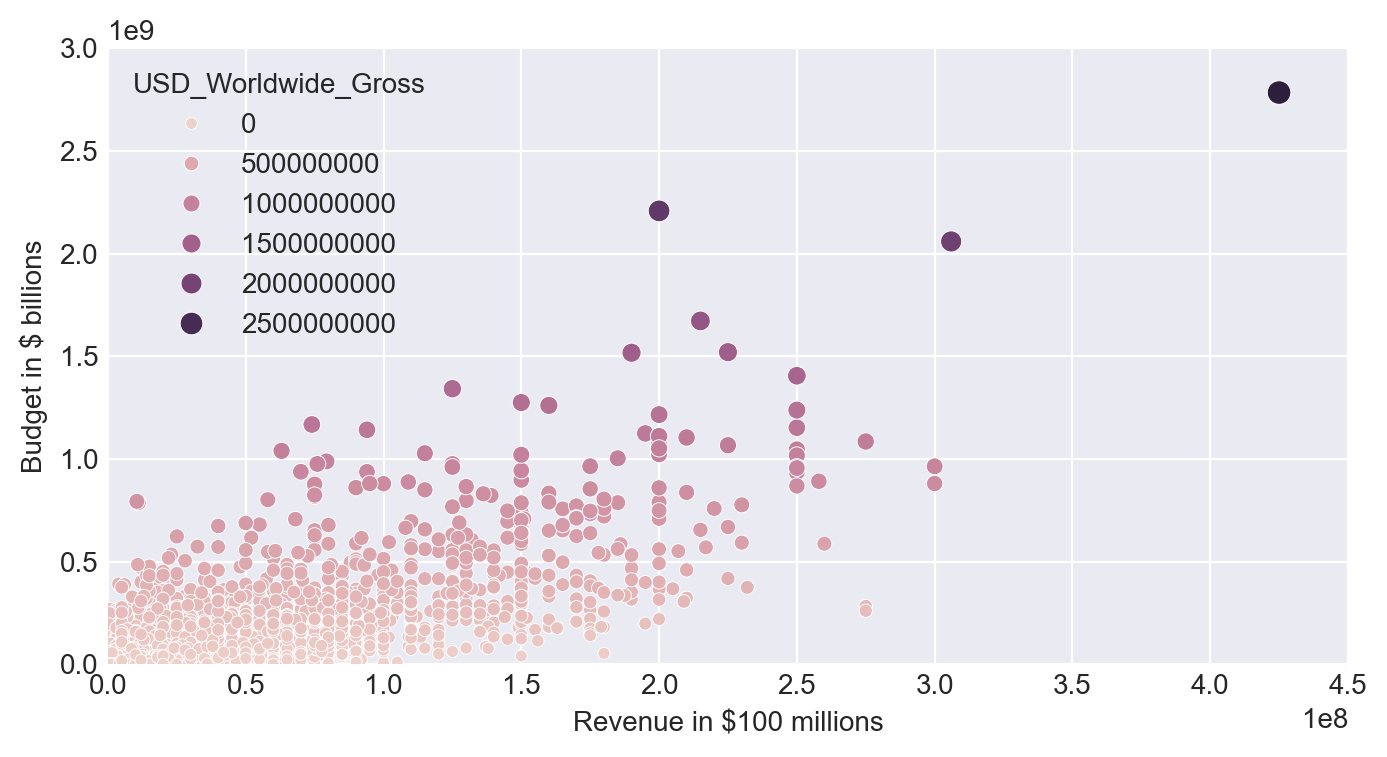

In [84]:
#add styling to all figures
plt.style.use('seaborn-v0_8-darkgrid')

#add styling only to below figure
fig, ax = plt.subplots(figsize=(8,4), dpi=200)
# with sns.axes_style('ticks'):
ax = sns.scatterplot(data=data_clean,
            x='USD_Production_Budget',
            y="USD_Worldwide_Gross",
            hue="USD_Worldwide_Gross", #color
            size="USD_Worldwide_Gross"); #dot size
ax.set(
    xlim=(0,450000000),
    ylim=(0,3000000000),
    xlabel="Revenue in $100 millions",
    ylabel ="Budget in $ billions");

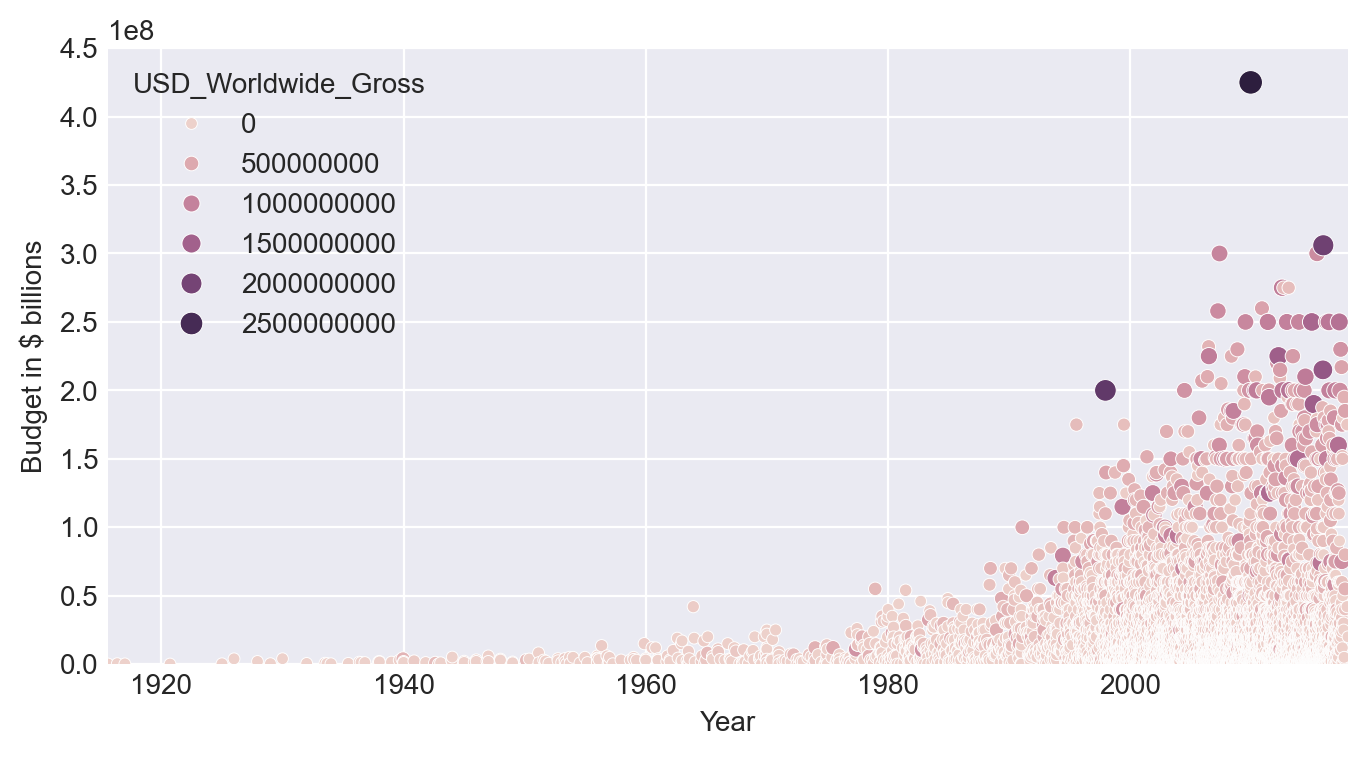

In [93]:
fig, ax = plt.subplots(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
            x='Release_Date',
            y='USD_Production_Budget',
            hue="USD_Worldwide_Gross", #color
            size="USD_Worldwide_Gross"); #dot size
ax.set(
    xlim=(data_clean["Release_Date"].min(),data_clean["Release_Date"].max()),
    ylim=(0,450000000),
    xlabel="Year",
    ylabel ="Budget in $ billions");

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [92]:
datetime_object=pd.DatetimeIndex(data_clean["Release_Date"])
years = datetime_object.year
decades = years//10*10
data_clean["Decade"] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [96]:
old_films = data_clean[data_clean["Release_Date"] < '01/01/1970']
old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960


In [101]:
old_films.sort_values("USD_Production_Budget",ascending=False).head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


In [97]:
new_films= data_clean[data_clean["Release_Date"]> '01/01/1970']
new_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
159,5027,1970-03-26,Woodstock,600000,34505110,34505110,1970
160,4259,1970-05-13,The Ballad of Cable Hogue,3716946,5000000,3500000,1970
161,4349,1970-05-26,Beneath the Planet of the Apes,3000000,17489009,17489009,1970
162,2598,1970-06-24,Catch-22,18000000,24911670,24911670,1970
163,2076,1970-09-23,"Tora, Tora, Tora",25000000,29548291,29548291,1970
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


# Seaborn Regression Plots

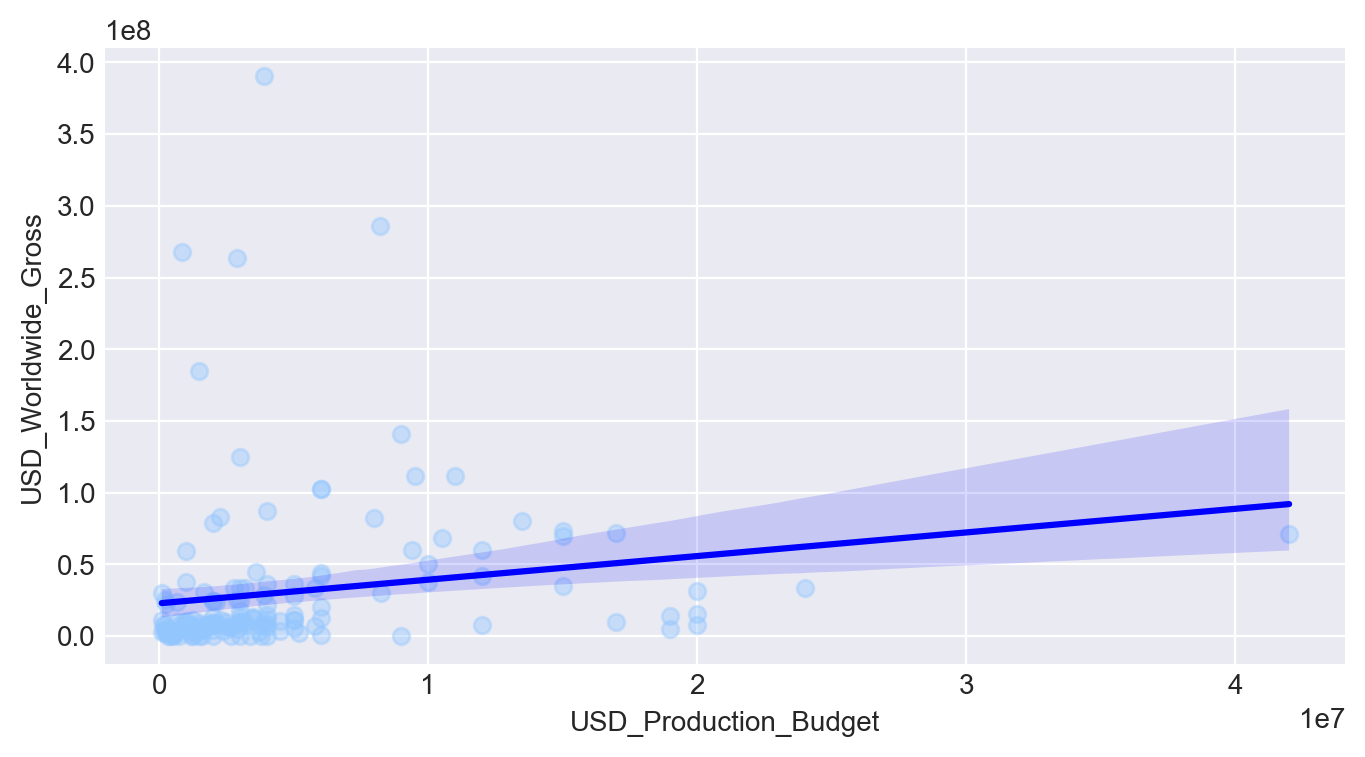

In [105]:
plt.style.use('seaborn-v0_8-pastel')
fig,ax = plt.subplots(figsize=(8,4),dpi=200)
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws={'alpha':0.4},
            line_kws={'color':'blue'});

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

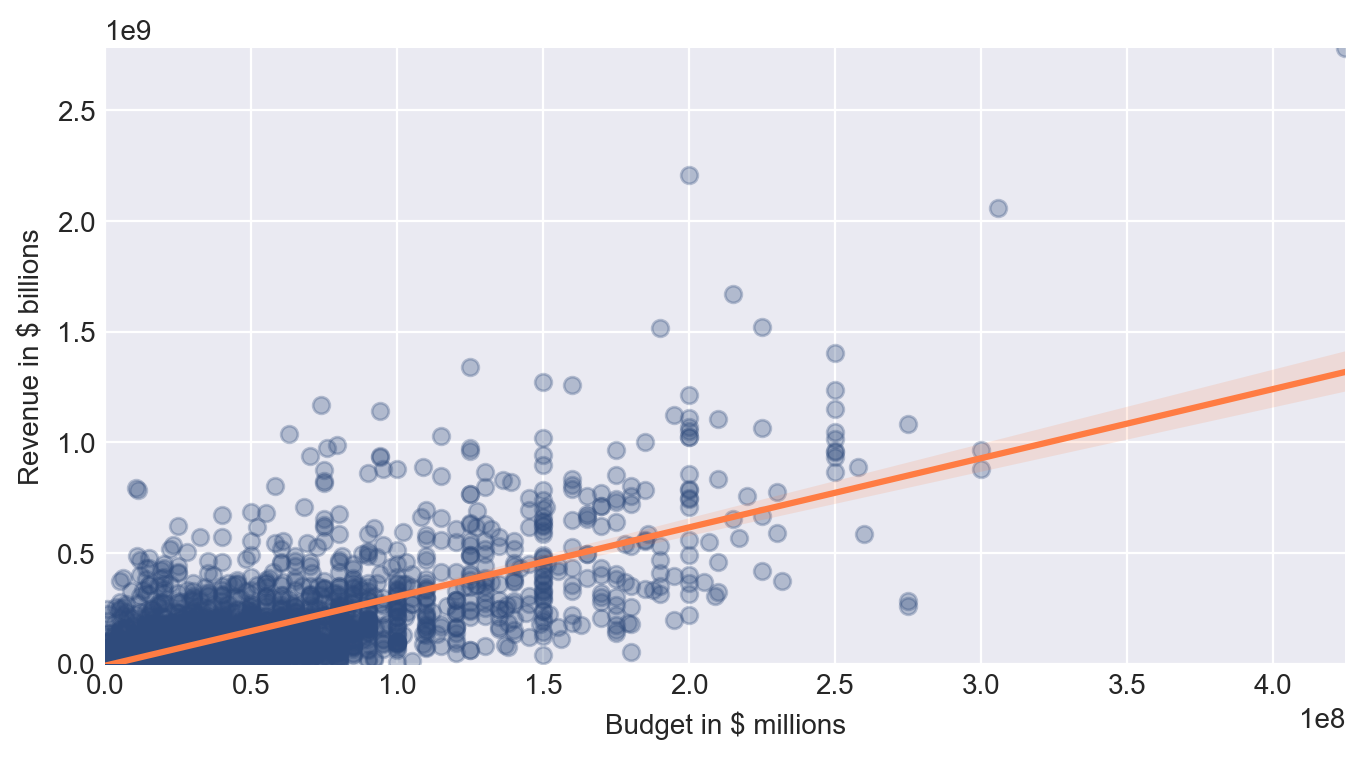

In [113]:
plt.style.use('seaborn-v0_8-darkgrid')
fig,ax = plt.subplots(figsize=(8,4),dpi=200)
ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': '#ff7c43' });

ax.set(xlim=(0,new_films['USD_Production_Budget'].max()),
        ylim=(0,new_films['USD_Worldwide_Gross'].max()),
        xlabel= 'Budget in $ millions',
        ylabel='Revenue in $ billions');

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 